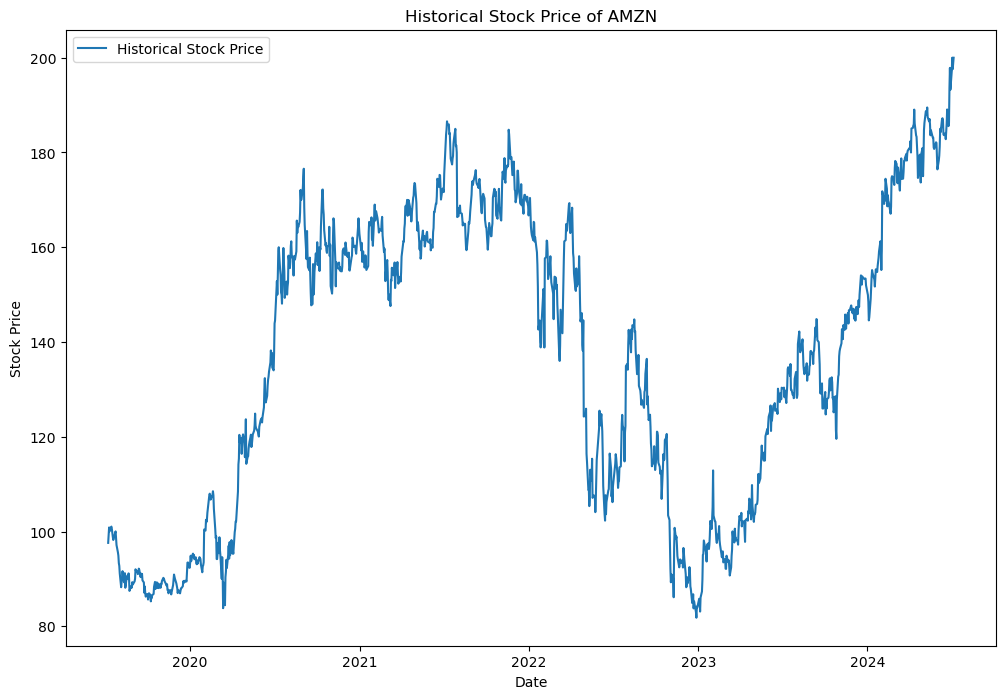

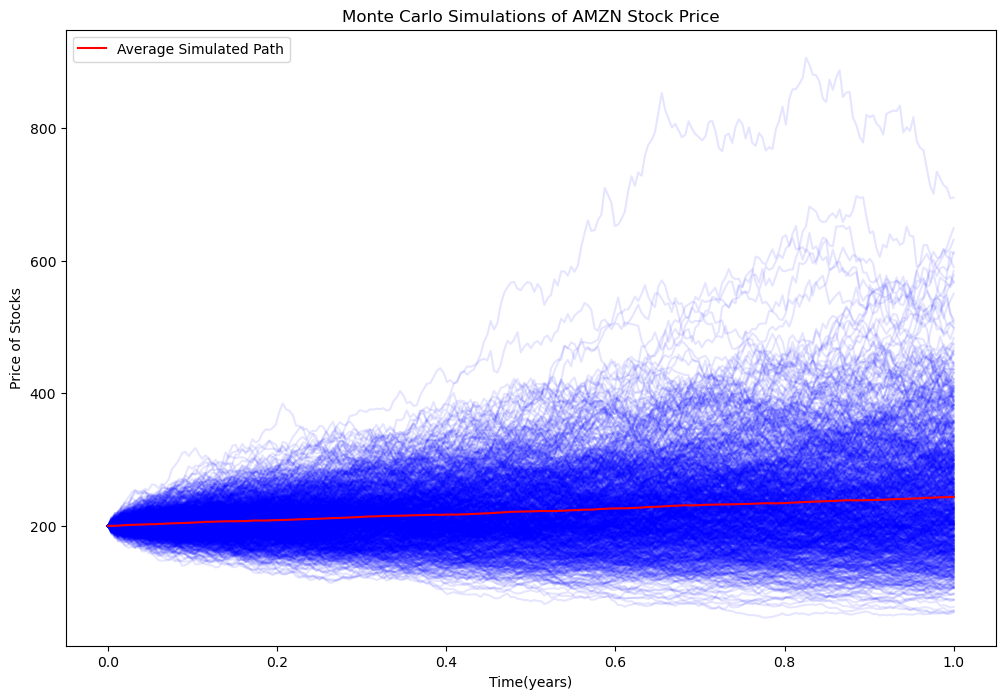

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the stock ticker symbol
ticker = 'AMZN'

# Fetch historical data for the stock using yfinance
stock = yf.Ticker(ticker)
hist_data = stock.history(period='5y')  # Fetch 5 years of historical data

# Plotting historical stock prices
plt.figure(figsize=(12, 8))
plt.plot(hist_data['Close'], label='Historical Stock Price')
plt.title(f'Historical Stock Price of {ticker}')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Monte Carlo Simulation of stock prices
def monte_carlo_simulation(S0, re, sigma, T, dt, n):
    """
    Perform Monte Carlo simulation for stock prices.

    Parameters:
    S0 : float
        Initial stock price.
    re : float
        Expected return (annualized).
    sigma : float
        Volatility of the stock (annualized).
    T : float
        Time horizon (in years).
    dt : float
        Time step (in years).
    n : int
        Number of simulations.

    Returns:
    t : numpy.ndarray
        Array of time steps.
    S : numpy.ndarray
        Array of simulated stock prices for each simulation.
    """
    t = np.arange(0, T + dt, dt)  # Time steps
    num_steps = len(t)
    S = np.zeros((num_steps, n))  # Array to store simulated prices
    S[0] = S0  # Initial stock price
    for i in range(1, num_steps):
        Z = np.random.standard_normal(n)  # Generate random normal values
        S[i] = S[i-1] * np.exp((re - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    return t, S

# Parameters for the simulation
S0 = hist_data['Close'][-1]  # Last historical closing price as initial price
mu = hist_data['Close'].pct_change().mean() * 252  # Annualized mean return
sigma = hist_data['Close'].pct_change().std() * np.sqrt(252)  # Annualized volatility
T = 1  # Time horizon (1 year)
dt = 1/252  # Time step (daily)
N = 1000  # Number of simulations

# Running Monte Carlo simulation
t, simulated_prices = monte_carlo_simulation(S0, mu, sigma, T, dt, N)

# Plotting simulated stock prices
plt.figure(figsize=(12, 8))
plt.plot(t, simulated_prices, color='blue', alpha=0.1)  # Plot all simulation paths
plt.plot(t, simulated_prices.mean(axis=1), color='red', label='Average Simulated Path')  # Plot average path
plt.title(f'Monte Carlo Simulations of {ticker} Stock Price')
plt.xlabel('Time (years)')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
